<a href="https://colab.research.google.com/github/sifat-hossain-niloy/Numerical_Analysis_Lab_3202/blob/main/Jacobi_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x(k): [0. 0. 0.]
x(k): [ 0.75        1.5        -0.85714286]
x(k): [ 0.91071429  1.89285714 -0.96428571]
x(k): [ 0.98214286  1.96428571 -0.99744898]
x(k): [ 0.99170918  1.99362245 -0.99744898]
x(k): [ 0.99904337  1.99681122 -1.00027332]
x(k): [ 0.99913448  1.99972668 -0.99968112]
x(k): [ 1.00001139  1.99965835 -1.0000846 ]
x(k): [ 0.99989344  2.0000179  -0.99994957]
x(k): [ 1.00001708  1.99995607 -1.00001778]
x(k): [ 0.99998457  2.00000866 -0.99999128]
x(k): [ 1.00000434  1.99999341 -1.00000344]
x(k): [ 0.99999749  2.00000202 -0.99999844]
x(k): [ 1.0000009   1.9999989  -1.00000065]
x(k): [ 0.99999956  2.00000041 -0.99999972]
x(k): [ 1.00000017  1.99999981 -1.00000012]
x(k): [ 0.99999992  2.00000008 -0.99999995]
x(k): [ 1.00000003  1.99999997 -1.00000002]
x(k): [ 0.99999999  2.00000001 -0.99999999]
x(k): [ 1.00000001  1.99999999 -1.        ]
x(k): [ 1.  2. -1.]
x(k): [ 1.  2. -1.]
x(k): [ 1.  2. -1.]
x(k): [ 1.  2. -1.]
x(k): [ 1.  2. -1.]
x(k): [ 1.  2. -1.]


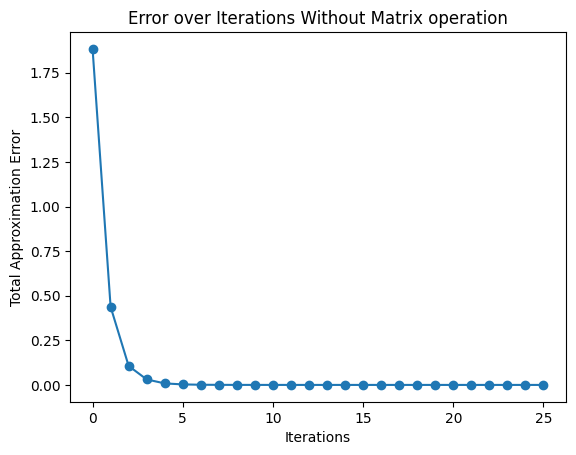

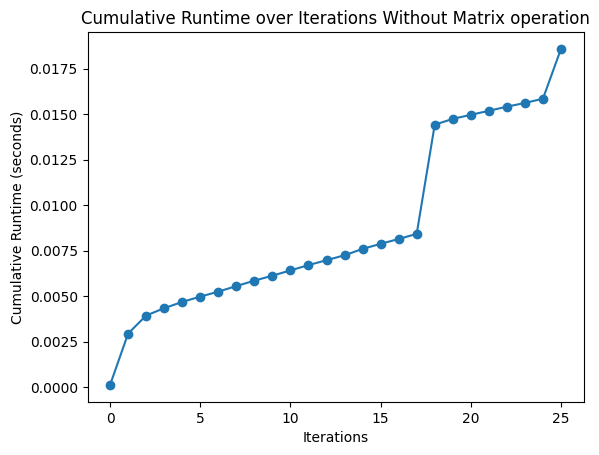

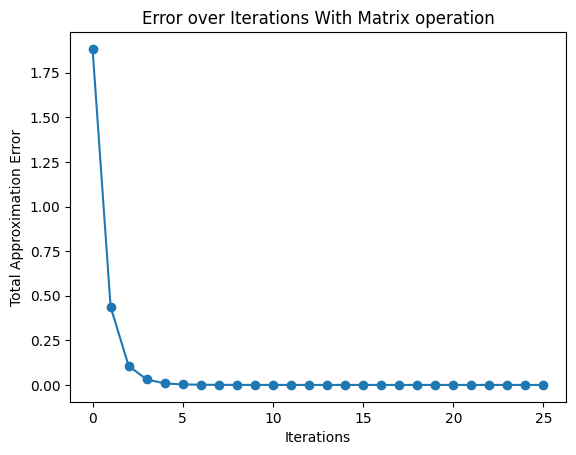

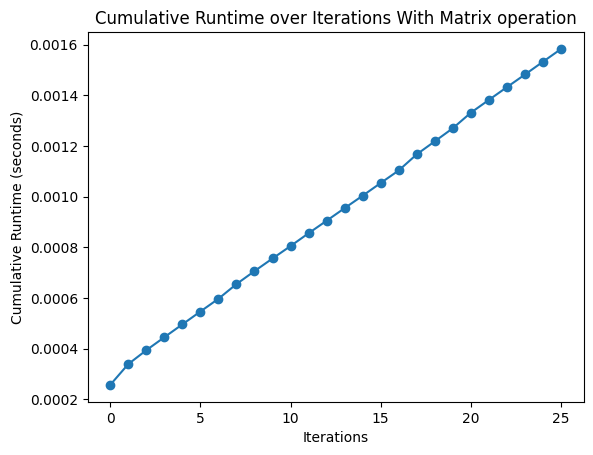

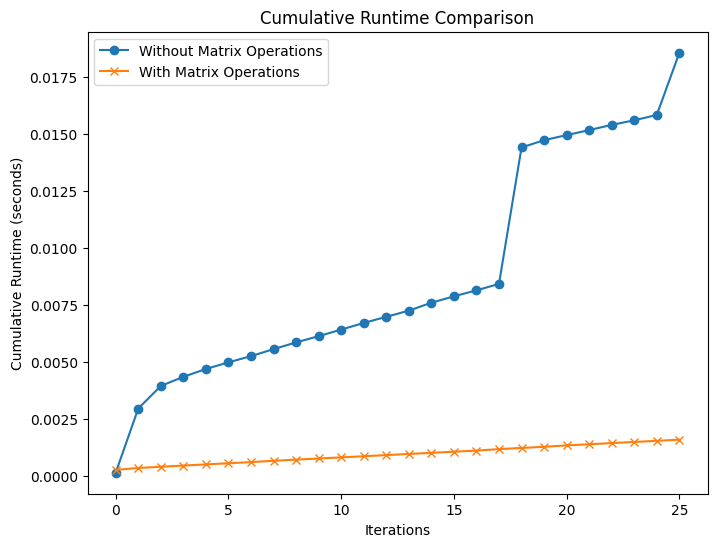

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi(a, b, n, max_iter=1000, tol=1e-10):
    x = np.zeros(n)
    errors = []
    runtimes = []
    start_time = time.time()

    for it in range(max_iter):
        x_new = np.copy(x)

        for i in range(n):
            x_new[i] = (b[i] - sum(a[i, j] * x[j] if i != j else 0 for j in range(n))) / a[i, i]

        error = np.linalg.norm(x_new - x)
        errors.append(error)
        runtimes.append(time.time() - start_time)

        print(f"x(k): {x}")

        if error < tol:
            break

        x = x_new

    return x, errors, runtimes

# Sample Input

# n = int(input("n: "))
# a = np.array([list(map(float, input().split())) for _ in range(n)])
# b = np.array([float(input()) for _ in range(n)])

n = 3
a = np.array([[4, -1, -1], [-2, 6, 1], [-1, 1, 7]])
b = np.array([3, 9, -6])

x, errors, runtimes = jacobi(a, b, n)

# Plotting
plt.figure()
plt.plot(errors,marker ='o')
plt.xlabel('Iterations')
plt.ylabel('Total Approximation Error')
plt.title('Error over Iterations Without Matrix operation')
plt.show()

plt.figure()
plt.plot(runtimes,marker ='o')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime (seconds)')
plt.title('Cumulative Runtime over Iterations Without Matrix operation')
plt.show()


def jacobi_matrix(a, b, n, max_iter=1000, tol=1e-10):
    x = np.zeros(n)
    errors_matrix = []
    runtimes_matrix = []
    start_time = time.time()

    D = np.diag(np.diag(a))
    R = a - D

    for it in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        error = np.linalg.norm(x_new - x)
        errors_matrix.append(error)
        runtimes_matrix.append(time.time() - start_time)

        if error < tol:
            break

        x = x_new

    return x, errors_matrix, runtimes_matrix

x_matrix, errors_matrix, runtimes_matrix = jacobi_matrix(a, b, n)

# Plotting
plt.figure()
plt.plot(errors_matrix,marker ='o')
plt.xlabel('Iterations')
plt.ylabel('Total Approximation Error')
plt.title('Error over Iterations With Matrix operation')
plt.show()

plt.figure()
plt.plot(runtimes_matrix,marker ='o')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime (seconds)')
plt.title('Cumulative Runtime over Iterations With Matrix operation')
plt.show()


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(runtimes, label='Without Matrix Operations',marker='o')
plt.plot(runtimes_matrix, label='With Matrix Operations', marker='x')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime (seconds)')
plt.title('Cumulative Runtime Comparison')
plt.legend()
plt.show()
